<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/CNN_Horses_vs_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-15 11:15:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 74.125.200.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  63.3MB/s    in 2.3s    

2020-08-15 11:15:20 (63.3 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [175]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-15 11:15:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  17.3MB/s    in 0.6s    

2020-08-15 11:15:28 (17.3 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [176]:
import os 
import zipfile

In [177]:
#unzipping the data
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

zip_ref.close()

In [178]:
#defining the subdirectories
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [179]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])
validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse32-3.png', 'horse07-8.png', 'horse01-4.png', 'horse33-9.png', 'horse03-9.png', 'horse38-9.png', 'horse07-7.png', 'horse42-1.png', 'horse39-7.png', 'horse50-4.png']
['human08-26.png', 'human01-07.png', 'human05-07.png', 'human02-06.png', 'human12-12.png', 'human13-08.png', 'human16-19.png', 'human03-05.png', 'human13-21.png', 'human16-07.png']
['horse2-441.png', 'horse6-275.png', 'horse1-436.png', 'horse5-488.png', 'horse1-122.png', 'horse6-198.png', 'horse5-100.png', 'horse4-389.png', 'horse5-400.png', 'horse5-065.png']
['valhuman02-10.png', 'valhuman05-15.png', 'valhuman03-22.png', 'valhuman01-23.png', 'valhuman03-07.png', 'valhuman04-01.png', 'valhuman05-02.png', 'valhuman04-05.png', 'valhuman02-15.png', 'valhuman04-18.png']


In [180]:
print('Horse Training Images: ',len(os.listdir(train_horse_dir)))
print('Human Training Images: ',len(os.listdir(train_human_dir)))

print('Horse Validation Images: ',len(os.listdir(validation_horse_dir)))
print('Human Validation Images: ',len(os.listdir(validation_human_dir)))

Horse Training Images:  500
Human Training Images:  527
Horse Validation Images:  128
Human Validation Images:  128


In [181]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [182]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [183]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

(300, 300, 3)


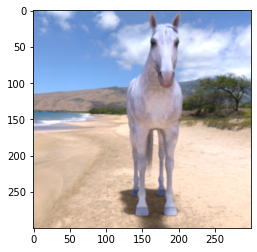

In [184]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [185]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


(300, 300, 3)


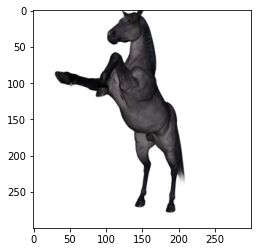

In [186]:
x, y = validation_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [187]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [188]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [189]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 33, 33, 64)       

In [190]:
from tensorflow.keras.optimizers import RMSprop

In [191]:
model.compile(
    optimizer = RMSprop(lr=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [192]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8,
    callbacks = tf.keras.callbacks.EarlyStopping()
)

Epoch 1/15
8/8 [==============================] - 6s 793ms/step - loss: 1.0272 - accuracy: 0.4694 - val_loss: 0.6705 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 6s 763ms/step - loss: 0.7299 - accuracy: 0.6630 - val_loss: 0.6647 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 6s 764ms/step - loss: 0.5688 - accuracy: 0.6785 - val_loss: 0.3235 - val_accuracy: 0.8984
Epoch 4/15
8/8 [==============================] - 6s 757ms/step - loss: 0.5885 - accuracy: 0.8254 - val_loss: 0.4001 - val_accuracy: 0.8359


In [201]:
from google.colab import files
from keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print('It is a human')
  else:
    print('It is a horse')

Saving horse.jpg to horse.jpg
[0.]
It is a horse
